In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib as mpl

In [2]:
hdu = fits.open('Messier_67_Gaia.gz')

In [3]:
data = hdu[1].data

In [4]:
def sample(data, sel=None):
    global ra, dec, plx, e_plx, pmra, pmdec, g, bp_rp
    try:
        if sel==None:
            sel = np.ones(len(data), dtype='bool')
    except:
        pass
    data = data[sel]
    ra = data['ra']
    dec = data['dec']
    plx = data['parallax']
    e_plx = data['parallax_error']
    pmra = data['pmra']
    pmdec = data['pmdec']
    g = data['phot_g_mean_mag']
    bp_rp = data['bp_rp']
    return data

In [5]:
data = sample(data)
print(f'The sample without any data selection has {data.size} stars')

The sample without any data selection has 9517 stars


(-0.728992625319687, 3.9972802840110933)

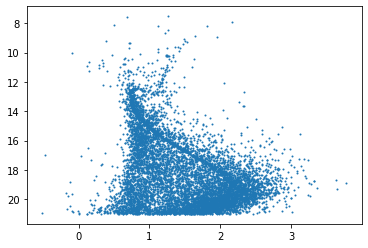

In [6]:
plt.scatter(bp_rp, g,s=1)
plt.gca().invert_yaxis()
plt.xlim()

In [7]:
sel_pmra = np.isnan(pmra)
sel_pmdec = np.isnan(pmdec)
sel_mag = np.isnan(g)
sel_col = np.isnan(bp_rp)
sel_plx = np.isnan(plx)

sel_good_data = sel_pmra|sel_pmdec|sel_mag|sel_col|sel_plx
data = sample(data, ~sel_good_data)
print(f'The sample after filtering blank values has {data.size} stars')

The sample after filtering blank values has 8044 stars


In [8]:
sel_plx = plx/e_plx > 0
data = sample(data, sel_plx)
print(f'The sample after filtering bad parallaxes has {data.size} stars')

The sample after filtering bad parallaxes has 7085 stars


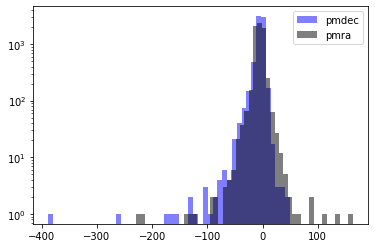

In [9]:
plt.hist(pmdec, bins=50, alpha=0.5, color='b', label='pmdec');
plt.hist(pmra, bins=50, alpha=0.5, color='k', label='pmra');
plt.yscale('log')
plt.legend()

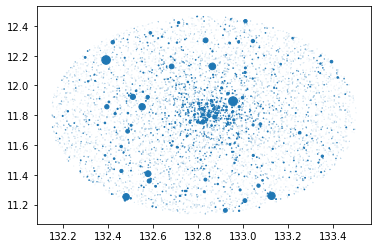

In [10]:
s = 8e4*10**(-g/2.5)
plt.scatter(ra, dec, s=s)

In [11]:
sel_pmra = (pmra<-9)&(pmra>-13)
sel_pmdec = (pmdec>-5)&(pmdec<-1)
sel_pm = sel_pmra&sel_pmdec
data = sample(data, sel_pm)
print(f'The sample after filtering PM has {data.size} stars')

The sample after filtering PM has 1686 stars


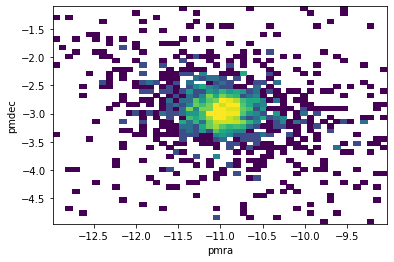

In [12]:
norm = mpl.colors.LogNorm(vmin=1, vmax=20)
h = plt.hist2d(pmra, pmdec,\
               bins=(50,50), norm=norm)
plt.xlabel('pmra')
plt.ylabel('pmdec');

(-0.2922518183253572, 2.976366274502115)

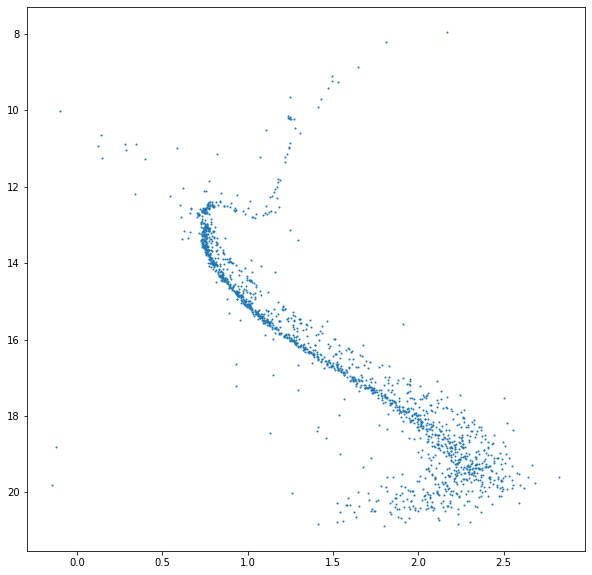

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(bp_rp, g,s=1)
plt.gca().invert_yaxis()
plt.xlim()

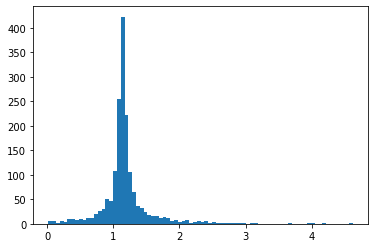

In [16]:
plt.hist(plx, bins=80);

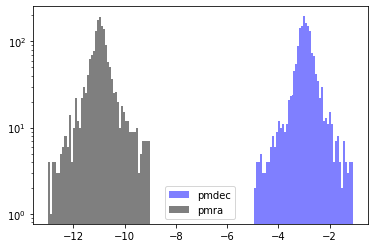

In [17]:
plt.hist(pmdec, bins=50, alpha=0.5, color='b', label='pmdec');
plt.hist(pmra, bins=50, alpha=0.5, color='k', label='pmra');
plt.yscale('log')
plt.legend()

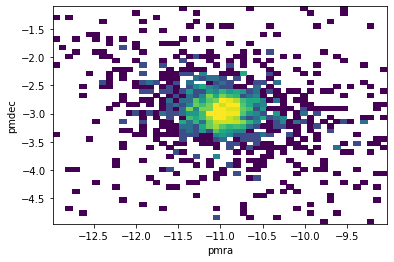

In [18]:
norm = mpl.colors.LogNorm(vmin=1, vmax=20)
h = plt.hist2d(pmra, pmdec,\
               bins=(50,50), norm=norm)
plt.xlabel('pmra')
plt.ylabel('pmdec');

(0.5, 3)

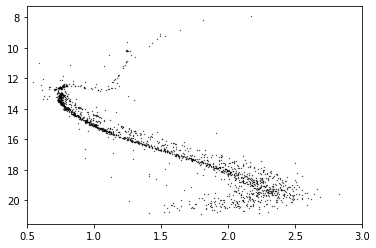

In [22]:
plt.scatter(bp_rp, g,s=0.1, color='k')
plt.gca().invert_yaxis()
plt.xlim(0.5,3)

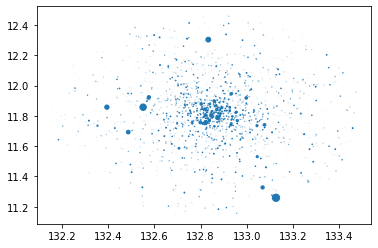

In [105]:
s = 8e4*10**(-g/2.5)
plt.scatter(ra, dec, s=s)

Median RA = 132.8422494303957
Median DEC = 11.814475896800161


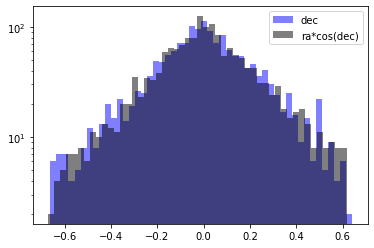

In [106]:
plt.hist(dec-np.median(dec), bins=50, alpha=0.5, color='b', label='dec');
plt.hist(np.cos(np.deg2rad(dec))*(ra-np.median(ra)), bins=50, alpha=0.5, color='k', label='ra*cos(dec)');
plt.yscale('log')
plt.legend()
print(f'Median RA = {np.median(ra)}')
print(f'Median DEC = {np.median(dec)}')

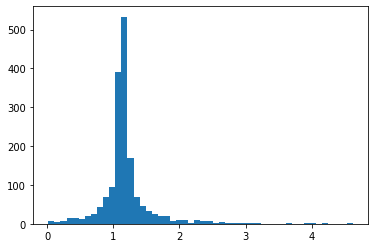

In [107]:
plt.hist(plx, bins=50);


In [108]:
1/np.median(plx)

0.8756555154106206

In [109]:
1/np.mean(plx)

0.848259502455361

In [110]:
dist_dec = dec-np.median(dec)
dist_ra = (ra-np.median(ra))*np.cos(np.deg2rad(dec))

In [111]:
r = np.linalg.norm([dist_ra, dist_dec], axis=0)

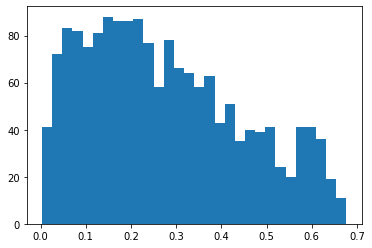

In [112]:
plt.hist(r, bins=30);

In [113]:
pm_r = np.linalg.norm([pmra-np.median(pmra), pmdec-np.median(pmdec)], axis=0)

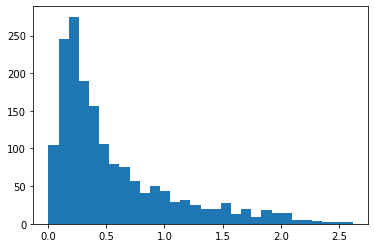

In [114]:
plt.hist(pm_r, bins=30);

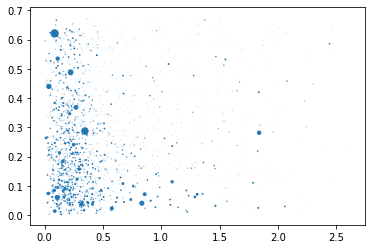

In [115]:
plt.scatter(pm_r, r, s=s)

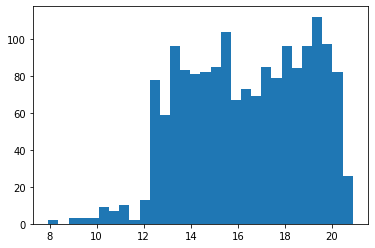

In [116]:
plt.hist(g, bins=30);

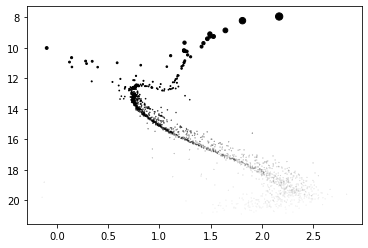

In [117]:
plt.scatter(bp_rp, g, s=s, color='k')
plt.gca().invert_yaxis()

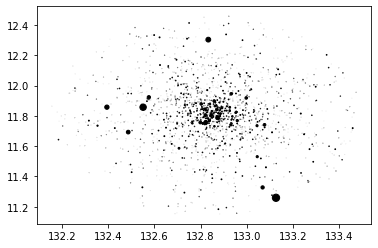

In [118]:
plt.scatter(ra, dec, s=s, color='k')